In [551]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
from datetime import datetime


In [552]:
df = pd.read_csv('/home/roy/Clusterirng/data/marketing_campaign.csv', sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors, and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### Attributes

**People**

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

- tWines: Amount spent on wine in the last 2 years
- tFruits: Amount spent on fruits in the last 2 years
- tMeatProducts: Amount spent on meat in the last 2 years
- tFishProducts: Amount spent on fish in the last 2 years
- tSweetProducts: Amount spent on sweets in the last 2 years
- MntGoldProds: Amount spent on gold in the last 2 years

**Promotion**

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalog
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to the company’s website in the last month

### Target

The task is to perform clustering to summarize customer segments.


In [553]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [554]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [555]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [556]:
df['Income'].fillna(df['Income'].mean(), inplace=True)

In [557]:
df.isnull().sum().sum()

0

In [558]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [559]:
df_copy = df.copy()

In [560]:
df['TotalChildren'] = df['Teenhome'] + df['Kidhome']

df.drop(columns=['Teenhome', 'Kidhome'], inplace=True)
df.drop(columns=['ID'],inplace=True)


In [561]:
education_categories = ['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']

education_mapping = {
    'Graduation': 4,
    'PhD': 5,
    'Master': 3,
    'Basic': 1,
    '2n Cycle': 2
}
education_array = df['Education'].tolist()
encoded_education = [education_mapping[education] for education in education_array]
df['education_encoded'] = encoded_education

In [562]:
marital_status_categories = ['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO']

marital_status_mapping = {
    'Single': 1,
    'Together': 2,
    'Married': 3,
    'Divorced': 4,
    'Widow': 5,
    'Alone': 6,
    'Absurd': 7,
    'YOLO': 8
}


marital_status_array = df['Marital_Status'].tolist()

encoded_marital_status = [marital_status_mapping[status] for status in marital_status_array]

df['maritalstatus_encoded'] = encoded_marital_status

In [563]:
df['age'] = datetime.now().year - df['Year_Birth']

In [564]:
df.drop(columns=['Education','Marital_Status','Year_Birth','Dt_Customer'],inplace=True)
df

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalChildren,education_encoded,maritalstatus_encoded,age
0,58138.0,58,635,88,546,172,88,88,3,8,...,0,0,0,3,11,1,0,4,1,66
1,46344.0,38,11,1,6,2,1,6,2,1,...,0,0,0,3,11,0,2,4,1,69
2,71613.0,26,426,49,127,111,21,42,1,8,...,0,0,0,3,11,0,0,4,2,58
3,26646.0,26,11,4,20,10,3,5,2,2,...,0,0,0,3,11,0,1,4,2,39
4,58293.0,94,173,43,118,46,27,15,5,5,...,0,0,0,3,11,0,1,5,3,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,42,118,247,2,9,...,0,0,0,3,11,0,1,4,3,56
2236,64014.0,56,406,0,30,0,0,8,7,8,...,1,0,0,3,11,0,3,5,2,77
2237,56981.0,91,908,48,217,32,12,24,1,2,...,0,0,0,3,11,0,0,4,4,42
2238,69245.0,8,428,30,214,80,30,61,2,6,...,0,0,0,3,11,0,1,3,2,67


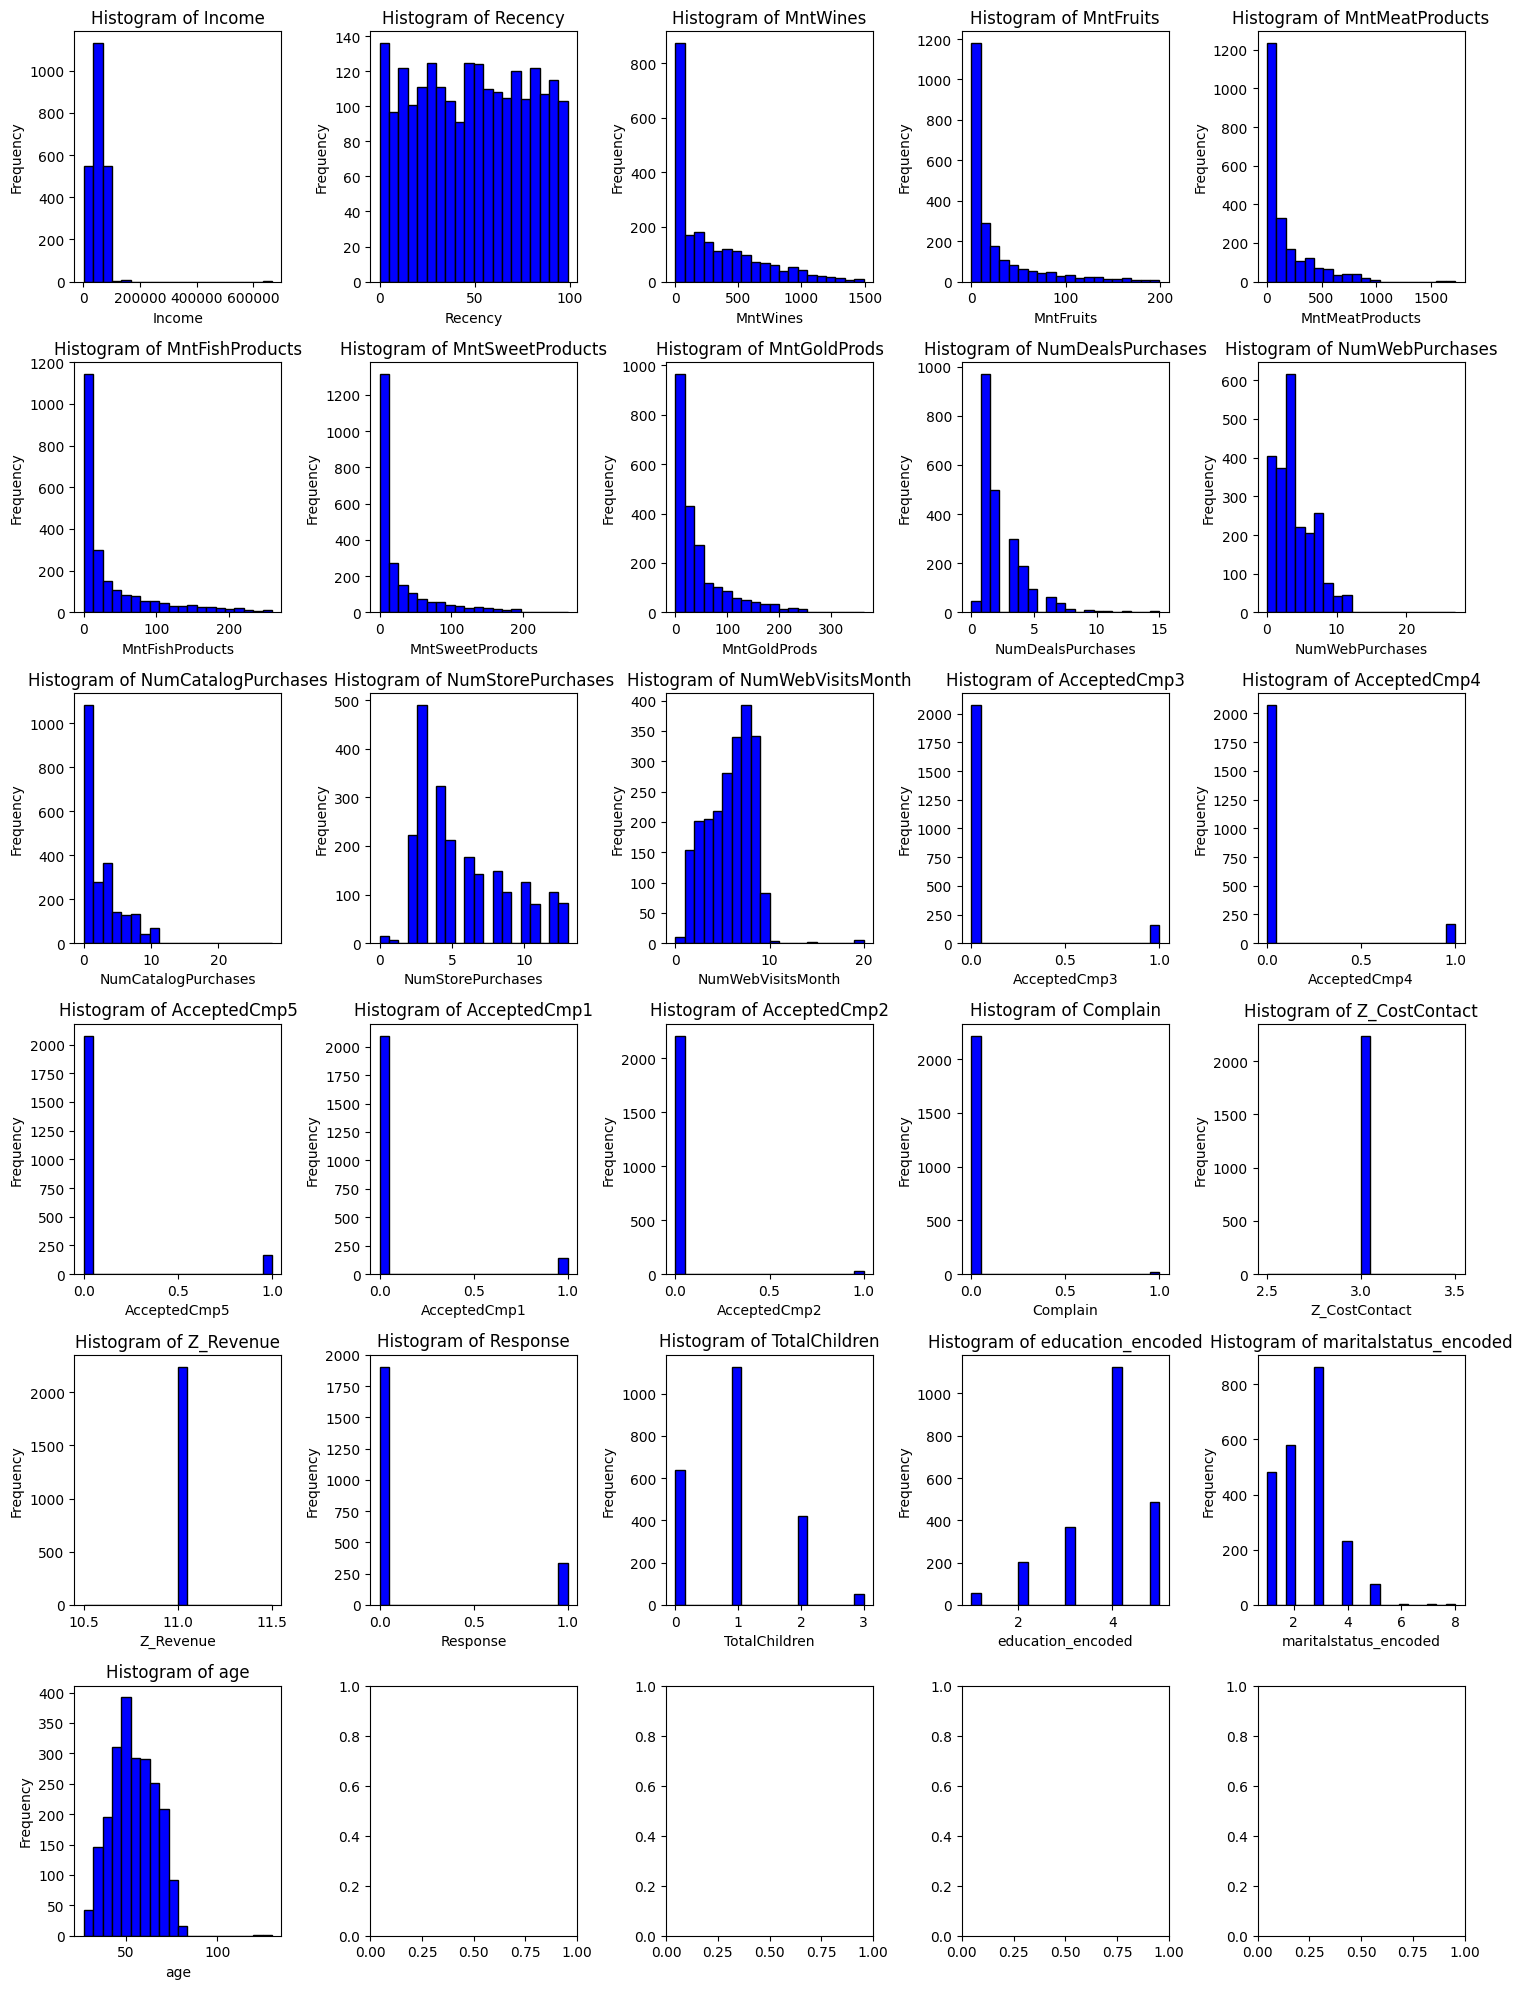

In [565]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

num_rows = 6 
num_cols = (len(numeric_columns) - 1) // num_rows + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    ax = axes[i]
    ax.hist(df[column], bins=20, edgecolor='black',color='b')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()

plt.show()

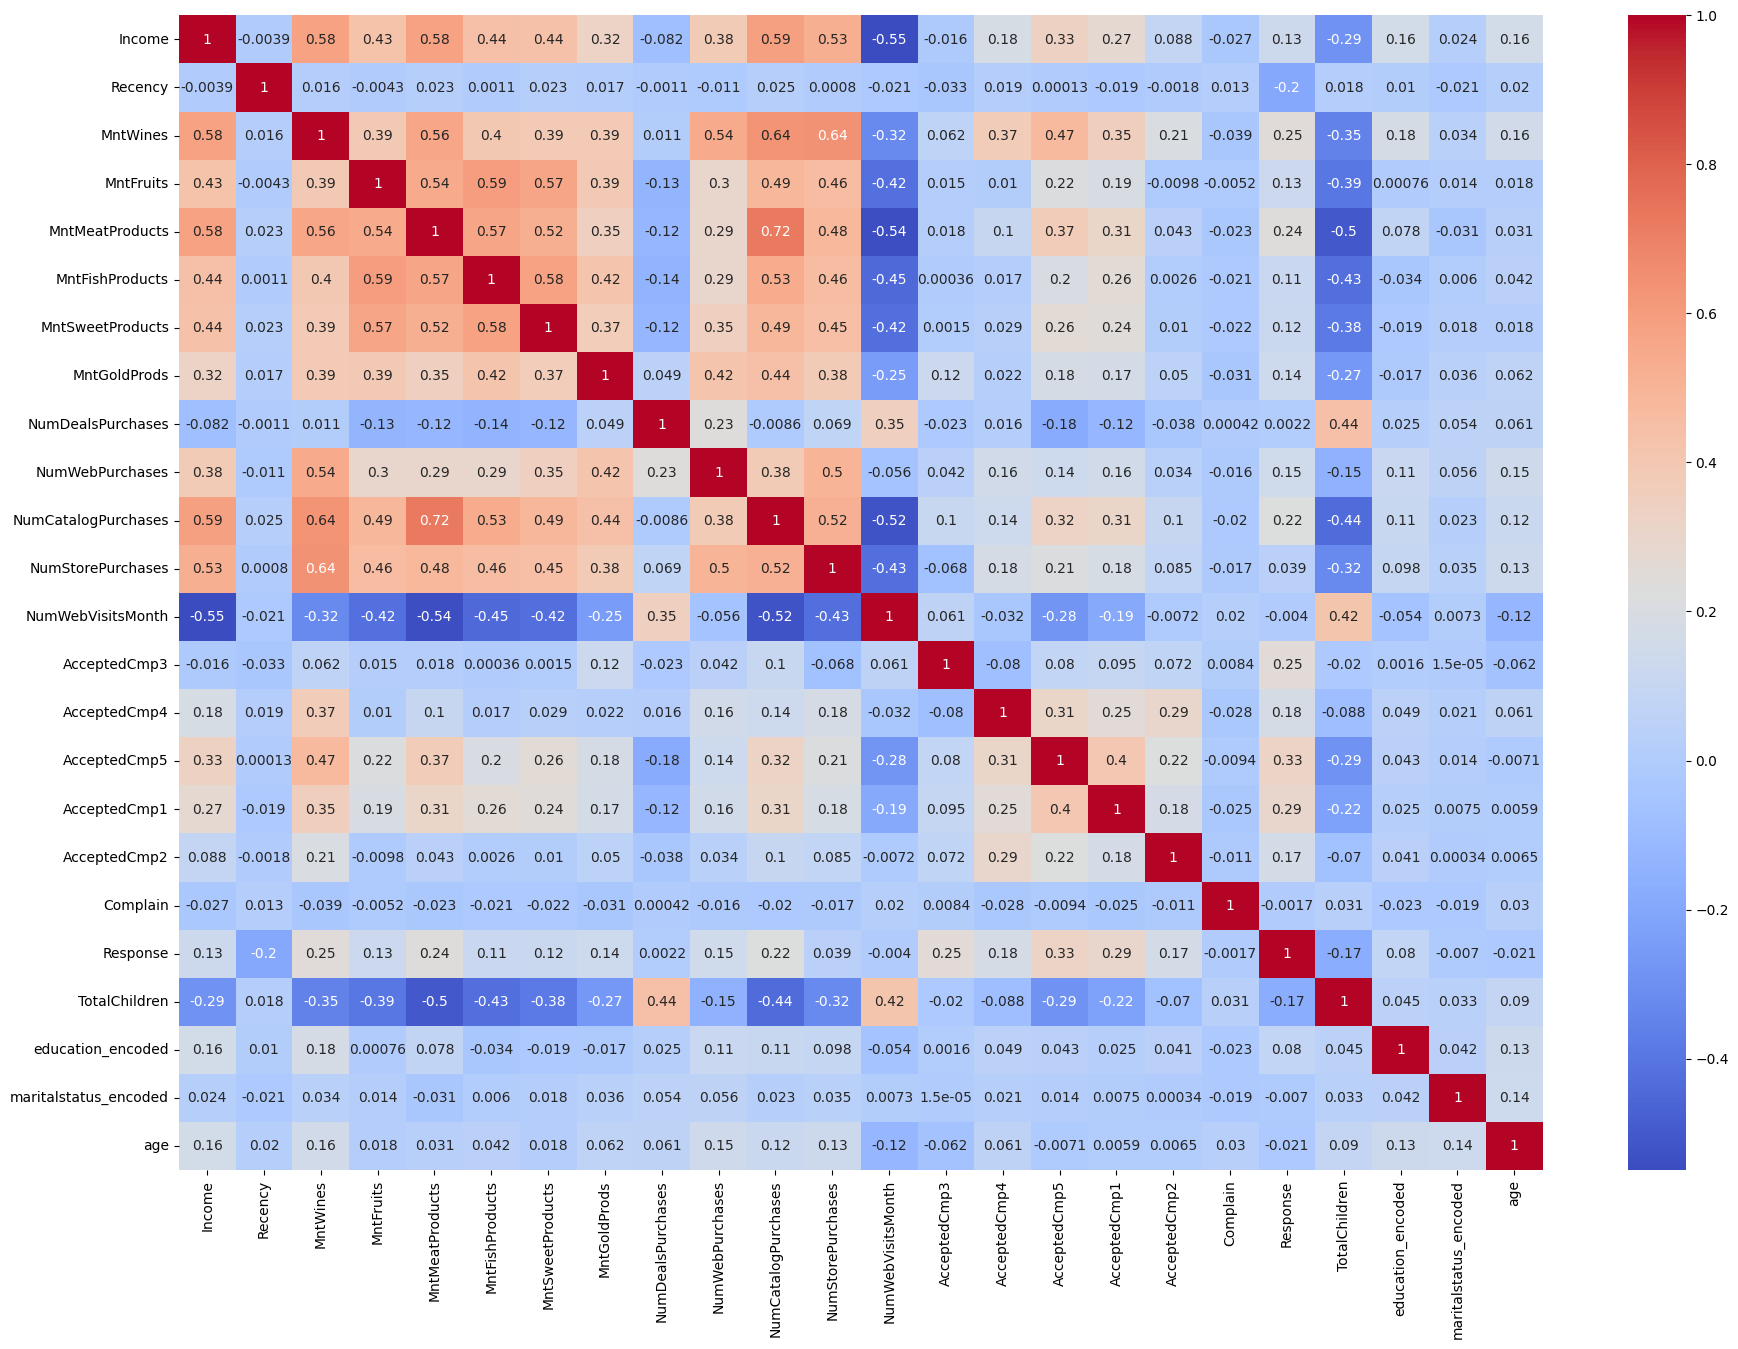

In [566]:
fig = plt.figure(figsize=(22,15))
sns.heatmap(df.drop(columns=['Z_CostContact','Z_Revenue']).corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

# escalado 

In [567]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [568]:
df_scaled = pd.DataFrame(df_scaled,columns=df.columns)
df_scaled

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalChildren,education_encoded,maritalstatus_encoded,age
0,0.235327,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,...,-0.262111,-0.11651,-0.097282,0.0,0.0,2.388846,-1.264505,0.210275,-1.394226,0.985345
1,-0.235826,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,...,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,1.396361,0.210275,-1.394226,1.235733
2,0.773633,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,...,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,-1.264505,0.210275,-0.462802,0.317643
3,-1.022732,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,...,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,0.065928,0.210275,-0.462802,-1.268149
4,0.241519,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,...,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,0.065928,1.252343,0.468623,-1.017761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.358568,-0.107383,1.203678,0.419916,0.066692,0.081926,2.203398,3.891766,-0.168236,1.769263,...,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,0.065928,0.210275,0.468623,0.150717
2236,0.470064,0.237969,0.303291,-0.661449,-0.606873,-0.687068,-0.655733,-0.690659,2.420015,1.409304,...,3.815174,-0.11651,-0.097282,0.0,0.0,-0.418612,2.726794,1.252343,-0.462802,1.903435
2237,0.189106,1.446700,1.795020,0.545656,0.221789,-0.101168,-0.364974,-0.383886,-0.685887,-0.750450,...,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,-1.264505,0.210275,1.400048,-1.017761
2238,0.679035,-1.419719,0.368666,0.092992,0.208495,0.777683,0.071165,0.325527,-0.168236,0.689386,...,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,0.065928,-0.831794,-0.462802,1.068807


In [617]:

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors


In [602]:
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15) 
for _ in K:
    km = KMeans(n_clusters = _)
    y = km.fit_predict(df_scaled)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled,y))

/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f1e16f88ee0>
Traceback (most recent call last):
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/roy/anaconda3/lib/python3.10/site-p

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f1e16f88ee0>
Traceback (most recent call last):
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_modul

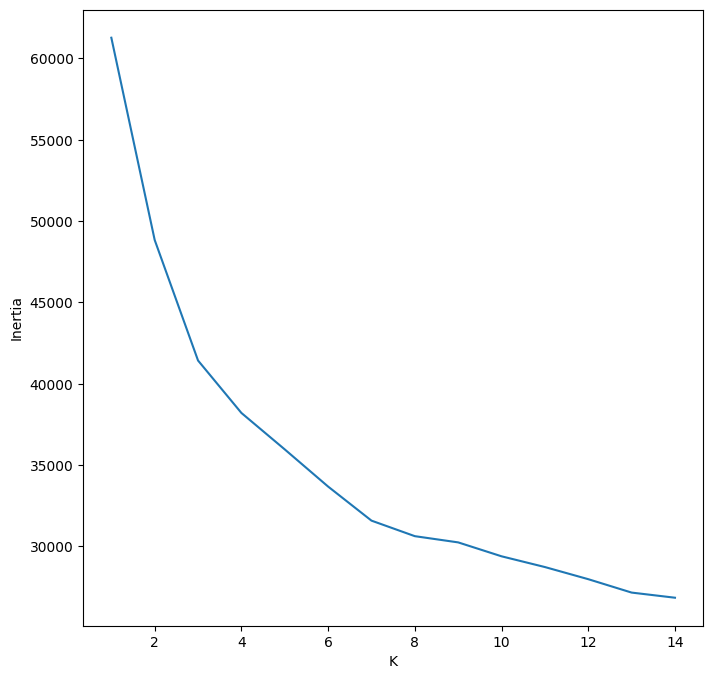

In [603]:
fig = plt.figure(figsize=(8,8))
plt.plot(range(1,15),wcss)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

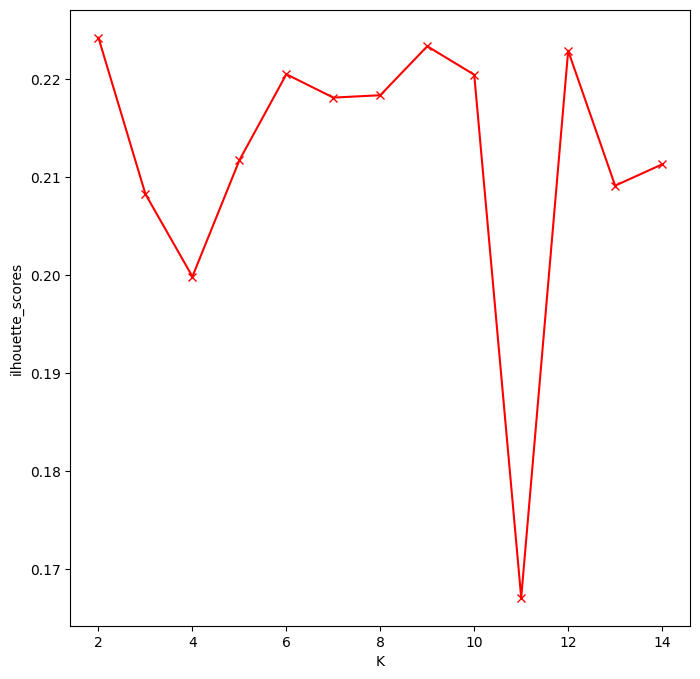

In [604]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('ilhouette_scores')  
plt.show()

In [627]:
km = KMeans(n_clusters=8)

y = km.fit_predict(df_scaled)

print(silhouette_score(df_scaled, y))
df['Kmeans'] = y 


/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f1e14c74b80>
Traceback (most recent call last):
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/roy/anaconda3/lib/python3.10/site-p

0.21080038495880238


## Agglomerativen hierarchical clustering

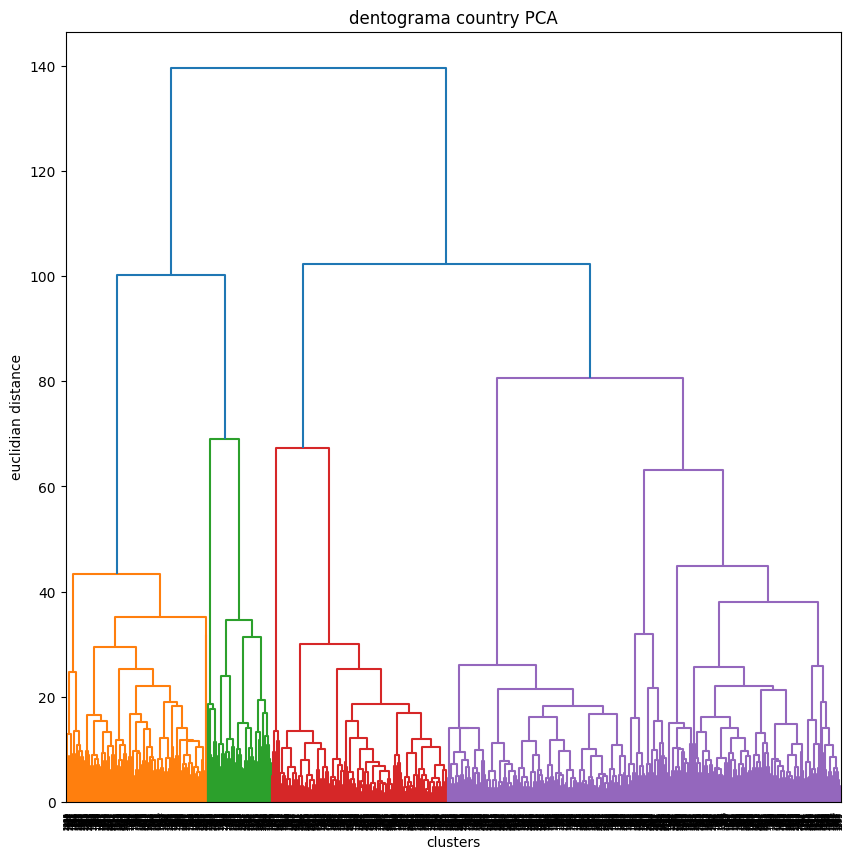

In [611]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(df_scaled, method='ward'))
plt.title('dentograma country PCA')
plt.xlabel('clusters')
plt.ylabel('euclidian distance') 
plt.show()

In [628]:
hc = AgglomerativeClustering(n_clusters= 8, affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(df_scaled)
print(silhouette_score(df_scaled,y_hc))
df['hierarchical'] = y_hc


0.2158030376669057


/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


# DBSCAN

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f1e15af1bd0>
Traceback (most recent call last):
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


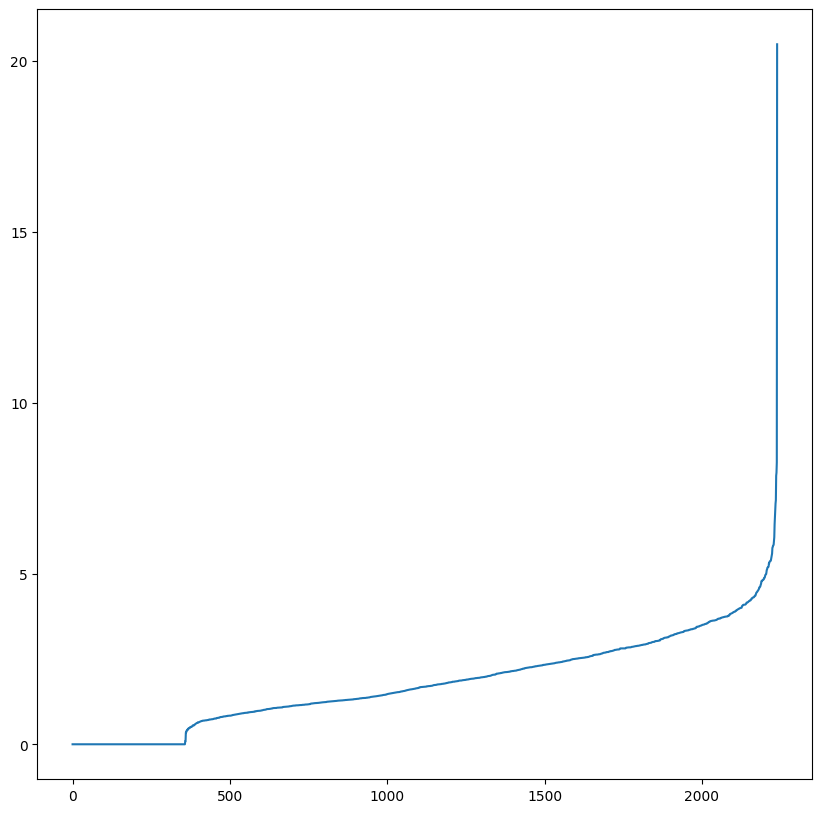

In [618]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
fig = plt.figure(figsize=(10,10))
plt.plot(distances)

In [619]:
eps_values = np.arange(3, 7, 0.50)
min_samples = np.arange(3,12)

In [620]:
from itertools import product 
dbscan_paramns = list(product(eps_values,min_samples))
no_of_clusters = []
sil_score = []
for p in dbscan_paramns:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_scaled)
    try:
        sil_score.append(silhouette_score(df_scaled,y_dbscan))
    except:
        sil_score.append(0)    
    no_of_clusters.append(len(np.unique(y_dbscan)))

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f1e15af2b90>
Traceback (most recent call last):
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_modul

In [621]:
df_param_tunning = pd.DataFrame.from_records(dbscan_paramns, columns=['Eps','Min_samples'])
df_param_tunning['sil_score'] = sil_score
df_param_tunning['n_clusters'] = no_of_clusters

In [622]:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_score', columns='Eps', index='Min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='Eps', index='Min_samples')

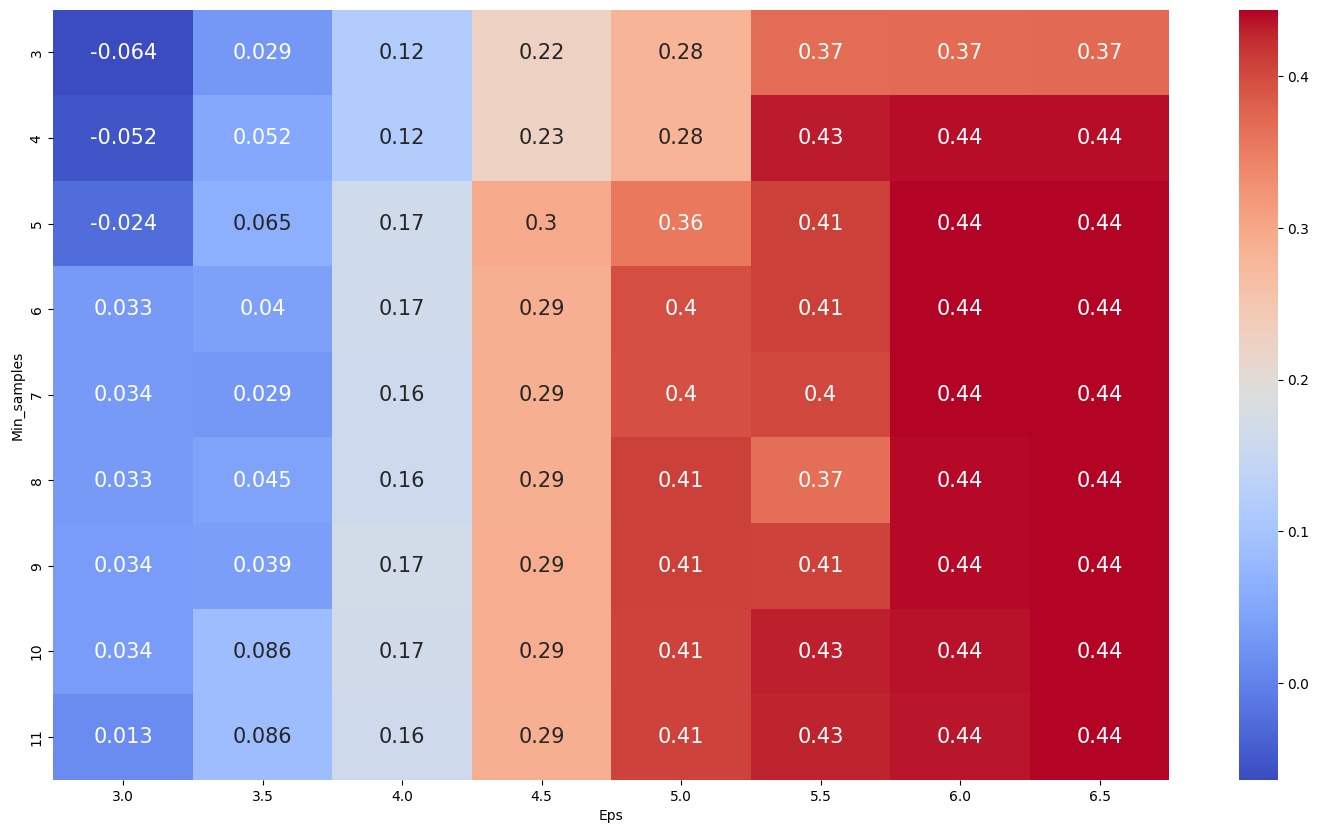

In [629]:
fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':15}, cmap='coolwarm', ax=ax)
plt.show()

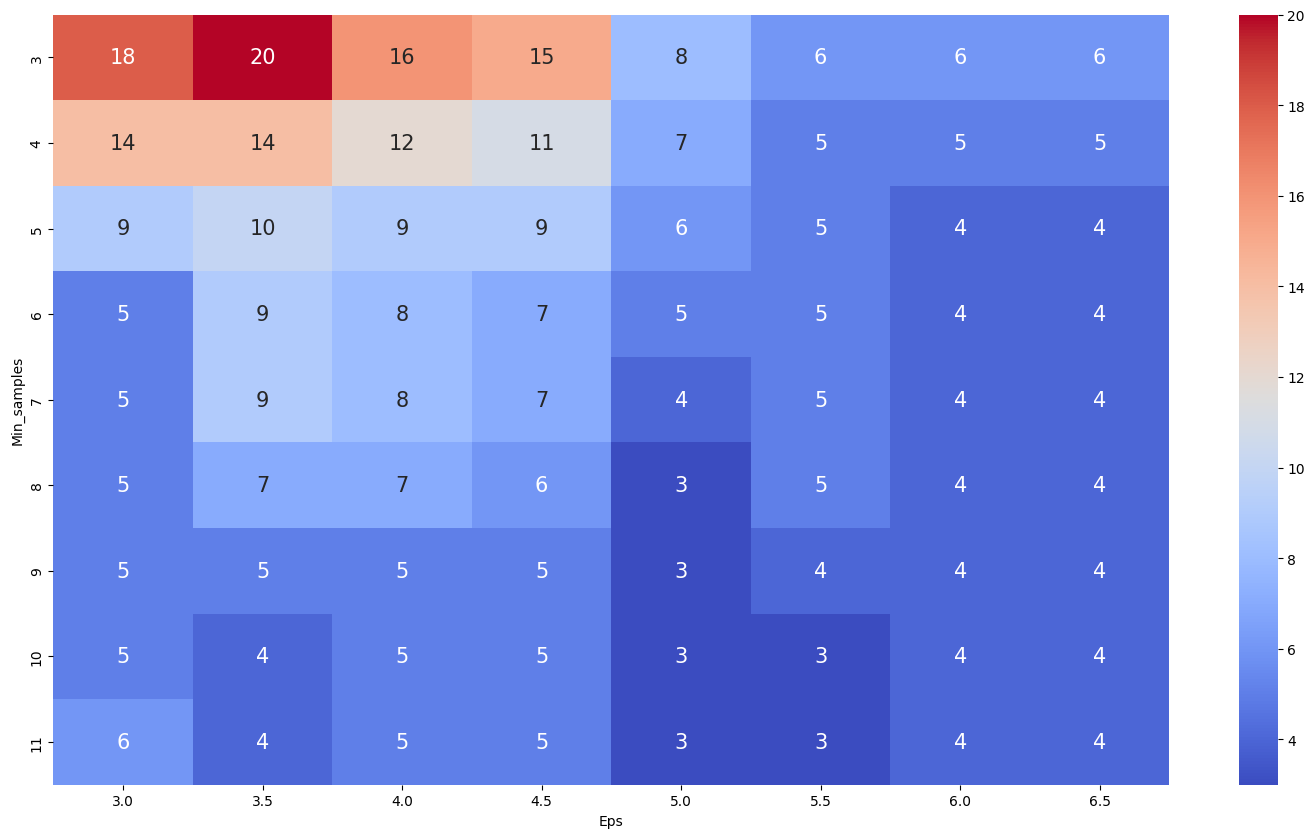

In [624]:
fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':15}, cmap='coolwarm', ax=ax)
plt.show()

In [636]:
dbscan_train = DBSCAN(eps=6, min_samples=7)
y_dbscan = dbscan_train.fit_predict(df_scaled)
print(silhouette_score(df_scaled,y_dbscan ))
df['DBSCAN'] = y_dbscan


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f1e15af0d30>
Traceback (most recent call last):
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


0.441906991183956


In [651]:
df.columns

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'TotalChildren',
       'education_encoded', 'maritalstatus_encoded', 'age', 'Customer_Group',
       'Kmeans', 'hierarchical', 'DBSCAN'],
      dtype='object')

In [639]:
df

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Z_Revenue,Response,TotalChildren,education_encoded,maritalstatus_encoded,age,Customer_Group,Kmeans,hierarchical,DBSCAN
0,58138.0,58,635,88,546,172,88,88,3,8,...,11,1,0,4,1,66,4,4,1,0
1,46344.0,38,11,1,6,2,1,6,2,1,...,11,0,2,4,1,69,4,0,4,0
2,71613.0,26,426,49,127,111,21,42,1,8,...,11,0,0,4,2,58,0,2,1,0
3,26646.0,26,11,4,20,10,3,5,2,2,...,11,0,1,4,2,39,5,1,7,0
4,58293.0,94,173,43,118,46,27,15,5,5,...,11,0,1,5,3,42,4,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,42,118,247,2,9,...,11,0,1,4,3,56,0,2,0,0
2236,64014.0,56,406,0,30,0,0,8,7,8,...,11,0,3,5,2,77,0,7,1,0
2237,56981.0,91,908,48,217,32,12,24,1,2,...,11,0,0,4,4,42,4,7,0,0
2238,69245.0,8,428,30,214,80,30,61,2,6,...,11,0,1,3,2,67,0,2,1,0


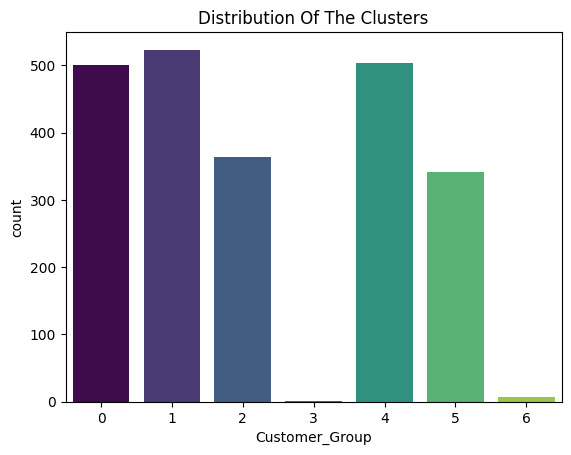

In [680]:
import matplotlib.cm as cm
cmap = cm.get_cmap('viridis')
num_clusters = len(df['Customer_Group'].unique())
custom_palette = [cmap(i/num_clusters) for i in range(num_clusters)]

# Crea el gráfico de barras con la paleta de colores personalizada
pl = sns.countplot(x=df["Customer_Group"], palette=custom_palette)

pl.set_title("Distribution Of The Clusters")
plt.show()

In [677]:
feature1 = 'Income' # x
feature2 = 'TotalChildren' # y 

In [678]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df[feature1],
    y=df[feature2 ],
    mode='markers',
    marker=dict(
        color=df['Kmeans'],
        colorscale='Viridis',
        size=8,
        colorbar=dict(title='Cluster')
    ),
    text=df['Kmeans'],  
    hoverinfo='text+x+y',  
))

fig.update_layout(
    xaxis_title=feature1 ,
    yaxis_title=feature2 ,
    title='K-Means Clustering',
)

fig.update_xaxes(range=[0, 200000])

fig.show()


In [673]:
fig_hierarchical = go.Figure()

fig_hierarchical.add_trace(go.Scatter(
    x=df[feature1],
    y=df[feature2 ],
    mode='markers',
    marker=dict(
        color=df['hierarchical'],
        colorscale='Viridis',
        size=8,
        colorbar=dict(title='Cluster')
    ),
    text=df['hierarchical'],  
    hoverinfo='text+x+y',  
))

fig_hierarchical.update_layout(
    xaxis_title=feature1 ,
    yaxis_title=feature2 ,
    title='Hierarchical Clustering',
)

fig_hierarchical.update_xaxes(range=[0, 200000])

fig_hierarchical.show()


In [674]:
fig_dbscan = go.Figure()

fig_dbscan.add_trace(go.Scatter(
    x=df[feature1],
    y=df[feature2],
    mode='markers',
    marker=dict(
        color=df['DBSCAN'],
        colorscale='Viridis',
        size=8,
        colorbar=dict(title='Cluster')
    ),
    text=df['DBSCAN'],  
    hoverinfo='text+x+y',  
))

fig_dbscan.update_layout(
    xaxis_title=feature1 ,
    yaxis_title=feature2 ,
    title='DBSCAN Clustering',
)

fig_dbscan.update_xaxes(range=[0, 200000])

fig_dbscan.show()
